## 1 d)

In this exercise we are going to estimate the expected values calculated in c). We seperate the task into two different cases as in 1c).

#### Remark: 
Since R starts indexing at 1, we will denote the states from 1,2,3 instead of 0,1,2 in the codes:
Susceptible = 1,  Infected = 2,  Recovered = 3, 


#### Case 1:
This code is going to simulate the Markov chain 1000 times untill the the infected state is reached from the susceptible state.


In [109]:
    # We start by defining the transition probability matrix
    P = matrix(c(0.95, 0, 0, 0.05, 0.8, 0, 0, 0.2, 1), nrow = 3)
    
    # Case 1 
    t=vector('numeric', length = 0)
    
    # Here we do a 1000 simulations
    for (n in 1:1000){
      
      #x is the state of the indiviual at time i, measured in days and starting in state 1 ( susceptible)
      x = vector('numeric', length = 1)
      x[1]=1
      i=1
      # We simulate the Markov chain  until we reach state 2 (infected )
       while (x[i]!=2){
          x <- append(x,sample.int(3, size = 1, replace = TRUE, prob = P[x[i],]),after=length(x))
          i=i+1
          }
        t<-append(t,i,after=length(t))
    }
      

     print(paste0('expected time from susceptible state to infected state: ',mean(t)))
   

[1] "expected time from susceptible state to infected state: 20.821"


#### Case 2:
This code is going to simulate the Markov chain 1000 times untill the the recovered state is reached from the infected state.

In [111]:
# Case 2
   t2=vector('numeric', length = 0)
   
   # Here we do a 1000 simulations
   for (n in 1:1000){
     
     #x is the state of the indiviual at time i, measured in days and starting in state 2 (infected)
     x2 = vector('numeric', length = 1)
     x2[1]=2
     i=1
     # We simulate the Markov chain  until we reach state 3 ( recovered )
     while (x2[i]!=3){
       x2 <- append(x2,sample.int(3, size = 1, replace = TRUE, prob = P[x2[i],]),after=length(x2))
       i=i+1
     }
     t2<-append(t2,i,after=length(t2))
   }
   
   print(paste0('expected time from infected state to recovered state: ',mean(t2)))

[1] "expected time from infected state to recovered state: 6.077"


## 1 e)

In this task we are going to simulate a Markov chain $Y_n = (S_n, I_n, R_n)$. 
And show the temporal evolution of $S_n, I_n, R_n$ over $n = 200$ days.

We decided to simulate the number of people in separate vectors for each state. 


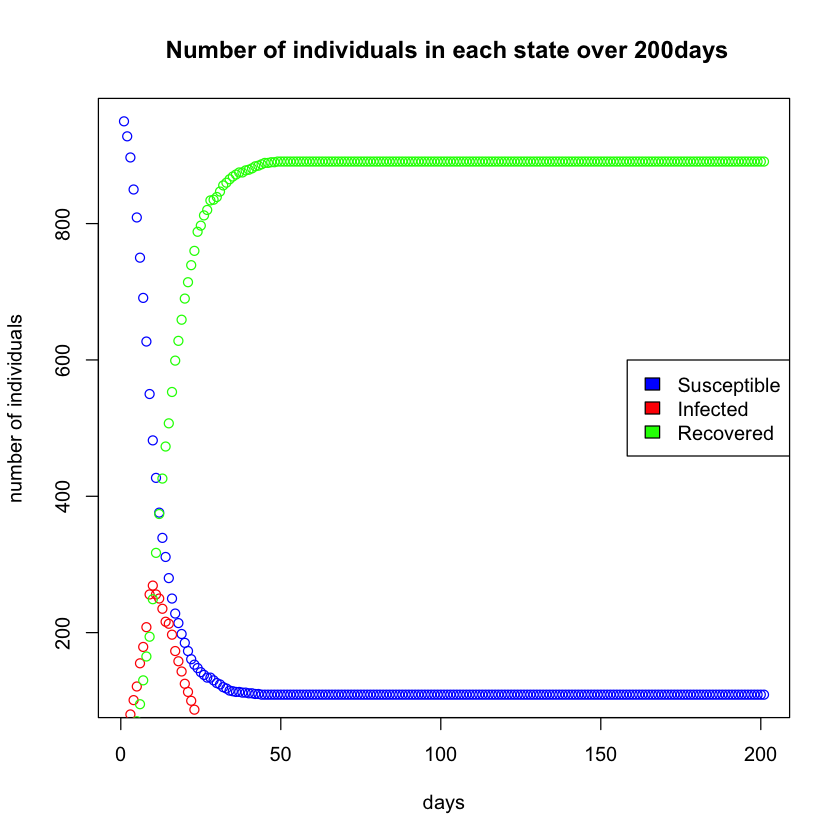

In [52]:
  #Initialization of the number of people in each state
  S=vector('numeric', length = 200)
  S[1]=950
  I=vector('numeric', length = 200)
  I[1]=50
  R=vector('numeric', length = 200)
  R[1]=0
  
  gamma=0.2 #the probability that a infected individual becomes recovered at each day
  
  #Total individuals in population
  T=1000
  for (n in 1:200){ #simulates 200 days
    beta=0.5*I[n]/T #the probability that a susceptible individual becomes infected at time n
    new_recovered = rbinom(1,size=I[n],prob=gamma)#number of individuals becoming recovered at time n
    new_infected = rbinom(1,size=S[n],prob=beta) #number of individuals becoming infected at time n
      
    S[n+1]=S[n]-new_infected #updates the number of susceptible individuals at time n
    I[n+1]=I[n]-new_recovered+new_infected #updates the number of infected individuals at time n
    R[n+1]=R[n]+new_recovered #updates the number of recovered individuals at time n
  }
    
  #plot
  n<-seq(1,201,1)
  plot(n,S,
  main=" Number of individuals in each state over 200days",
  ylab="number of individuals",
  xlab="days",
  type="p",
  col="blue")
  points(n,I,col="red")
  points(n,R,col="green")
  legend("right",
         c("Susceptible","Infected","Recovered"),
         fill=c("blue","red","green")
  )

## 1f)

We used the exact same code as in e) for each Markov chain simulation but we simulate the outbreak 1000 times. Then we find the expected maximum number of infected individuals and the expected first time that we get this value.

In [112]:
  max_infected= vector('numeric', length = 1000) #list of maximum number of infected individuals at each simulation
  time_max= vector('numeric', length = 1000) #list of time that the infected individuals takes its highest value.
  
  for (i in 1:1000){ #number of simulations
    T=1000
    for (n in 1:200){
      beta=0.5*I[n]/T
      new_recovered = rbinom(1,size=I[n],prob=gamma)
      new_infected = rbinom(1,size=S[n],prob=beta)
        
      S[n+1]=S[n]-new_infected
      I[n+1]=I[n]-new_recovered+new_infected
      R[n+1]=R[n]+new_recovered
    }
    max_infected[i]=max(I) 
    time_max[i]=match(max(I),I)
    
  }    
print(paste0('The expected maximum number of infected individuals: ', mean(max_infected)))
print(paste0('The expected time at which the number of infected individuals first takes its highest value: ',mean(time_max)))

[1] "The expected maximum number of infected individuals: 275.457"
[1] "The expected time at which the number of infected individuals first takes its highest value: 12.348"


## 2 a)

In this task we do 1000 realizations from the Poisson process to find the probability that there are more than 100 claims before March 1st.


In [83]:
  end = 59 # number of days from January 1st to March 1st
  lambda = 1.5 #rate parameter
  counter=0 #count every time there are more than 100 claims in a simulation 
  for (n in 1:1000){
    nb_events = rpois(1, lambda = lambda*end) #number of claims by March 1st simulated by a Poisson distribution
    if (nb_events>100){counter=counter+1} 
  }
  
print(paste0('The probability that there are more than 100 claims before March 1st: ', counter/1000))
  

[1] "The probability that there are more than 100 claims before March 1st: 0.119"


Then we make a plot that shows 10 of the realizations for $X(t)$.

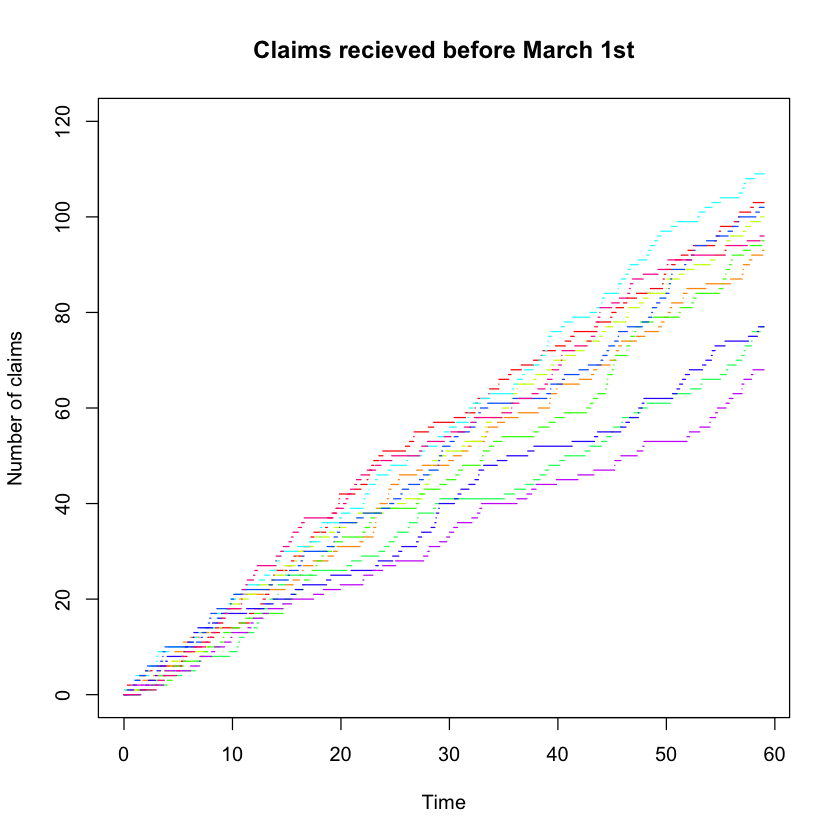

In [76]:
#plot of 10 realizations
  
plot(NULL, NULL,  #make an empty plot
       xlim = c(0, end), 
       ylim = c(0, 120), #assume that there are usually not more than 120 claims
       xlab = "Time", 
       ylab = "Number of claims", 
       main = "Claims recieved before March 1st")

colors = palette(rainbow(10)) #make a list of ten different colors
for (n in 1:10){    
      nb_events = rpois(1, lambda = lambda*end) #number of claims by March 1st simulated by a Poisson distribution
      locations = runif(nb_events, min = 0, max = end) # simulate the time of each event with a uniform distribution
      locations = c(0, sort(locations), end) # we sort the times in increasing order
      events= c(0:nb_events,nb_events) #y axis for our plot
  for(i in 1:(length(events)-1)){
      lines(locations[i:(i+1)], rep(events[i],2), col=colors[n]) }
    }
    


## 2 b)
Here we will compute the expected total claim amount and the variance of the total claim amount at
March 1 (59 days).

In [61]:
end = 59 # number of days from January 1st to March 1st
  lambda = 1.5 #rate parameter
  Z = vector('numeric', length = 1000) # Will contain the total claim amount for each simulation
  for (n in 1:1000){
    nb_events = rpois(1, lambda = lambda*end) #number of claims by March 1st simulated by a Poisson distribution
    C = rexp(nb_events,rate=10) # contain the amount of money per claim simulated by an exponential distribution
    Z[n]=sum(C) # total claim amount 
  }
  expectation=mean(Z) # expected total claim amount
  variance=sum((Z-expectation)^2)/999 #variance of total claim amount
  
  print(paste0('The expected total claim amount: ', expectation))
  print(paste0('The variance of the total claim amount: ', variance))

[1] "The expected total claim amount: 8.86960657906127"
[1] "The variance of the total claim amount: 1.6527822643518"
